
<h1><center>Projet de l’Analyse de Données : text mining dans les tweets</center></h1>



***

__Réalisé Par:__                                            
 - AKHADAM Ayoub                                            
 - OULAHBIB Idriss
 
__5 juil 2021__

***

## Introduction
    
L'objectif du projet "text mining dans les tweets" est d'analyser des données textuelles en se basant sur le jeu de 
données "airline sentiment analysis" issu de Twitter. Ces données contiennent des tweets sur les compagnies aériennes 
classés en tweets positifs, négatifs et neutres.
Le but est donc analyser ces données pour trouver les meilleurs et les pires compagnies aériennes et aussi comprendre les raisons pour lesquelles certaines compagnies aériennes sont commentées négativement.

## Données 
    - Le jeu des données est disponible sur : https://www.kaggle.com/welkin10/airline-sentiment-analysis/data
    - Le jeu des données contient : 15 variables et 14640 tweets.
    - Le jeu de données est composé des champs suivants:
        . tweet_id : l'identifiant de tweet
        . airline_sentiment : le sentiment de client
        . airline_sentiment_confidence : précision de detection de sentiment
        . negativereason : la raison d'un négative tweet
        . negativereason_confidence: précision de detection de la raison
        . airline : nom de la compagnie aérienne
        . airline_sentiment_gold : NA
        . name : nom de tweeteur
        . negativereason_gold : NA
        . retweet_count : nombre de retweets
        . text : le text de tweet
        . tweet_coord : la géolocalisation du tweeteur
        . tweet_created : la date de création de tweet
        . tweet_location : state de tweet
        . user_timezone : la zone temporaire du tweeteur.


##  Hypothèses et questions
       Les réseaux sociaux tels que Twitter ont un rôle important pour l'échange des avis sur différents sujets. Dans notre 
    cas, les clients partagent leurs expériences dans des vols américains. Nous pensons que les personnes ont une tendance 
    à laisser des avis négatifs que des avis positifs et cela peut être expliqué par le fait que les personnes cherchent à 
    prévenir d'autres clients de ne pas vivre  la même mauvaise expérience ou peut-être espèrent voir une amélioration.Pour 
    cela Nous émettons l'hypothèse  que la majorité des commentaires vont être négatives,nous supposons aussi que les 
    raisons de ces commentaires négatifs peuvent être par exemple une annulation ou un retard des vols.
       Donc avant de commençer l'analyse nous pouvons poser les questions suivantes:
    Q1 - Quel type de commentaire le plus dominant ?
    Q2 - Quelles compagnies aériennes sont les plus commentées négativement et positivement?
    Q3 - Quels sont les problèmes les plus courants en cas d'un mauvais vol ?
    Q4 - Quels mots sont les plus répandus, pour tous les commentaires positifs et négatifs et neutres?

## Text mining

    Text mining est l'analyse des données « non structurées » contenues dans le texte de langage naturel en utilisant différentes méthodes et outils.Il consiste à analyser les corpus de textes de manière à en reconnaître les mots, les phrases, et les relations et les sens de ces derniers entre eux pour extraire de l’information. 

## Méthodes d'analyse des données
    Le présent rapport contient les méthodes d'analyse des données suivantes:
    
    - AFC
    - Classification héarchique

***
## Chargement des packages nécessaires
***

In [86]:
options(warn=-1)
library(dplyr);library(ggplot2)

library(tm);library(RColorBrewer);library(SnowballC);library(wordcloud)

library(FactoMineR);library(factoextra);

# 1 - Aperçu sur les données

In [87]:
# Chargement des données
setwd('C:/Users/AKH/Desktop/SDAD/S2/Analyse des données/Projet/data/')
data <- read.csv("Tweets.csv")

In [88]:
dim(data) 

[1] 14640    15

In [89]:
# l'entête 
head(data)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5.703061e+17,neutral,1.0000,,NA,Virgin America,,cairdin,,0,@VirginAmerica What @dhepburn said.,,2015-02-24 11:35:52 -0800,,Eastern Time (US & Canada)
2,5.703011e+17,positive,0.3486,,0.0000,Virgin America,,jnardino,,0,@VirginAmerica plus you've added commercials to the experience... tacky.,,2015-02-24 11:15:59 -0800,,Pacific Time (US & Canada)
3,5.703011e+17,neutral,0.6837,,NA,Virgin America,,yvonnalynn,,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
4,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,,jnardino,,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",,2015-02-24 11:15:36 -0800,,Pacific Time (US & Canada)
5,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,,jnardino,,0,@VirginAmerica and it's a really big bad thing about it,,2015-02-24 11:14:45 -0800,,Pacific Time (US & Canada)
6,5.703008e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,,jnardino,,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing. it's really the only bad thing about flying VA,,2015-02-24 11:14:33 -0800,,Pacific Time (US & Canada)


In [90]:
unique(data[,'airline'])

[1] "Virgin America" "United"         "Southwest"      "Delta"         
[5] "US Airways"     "American"

    On a six compagnies aériennes : Virgin America, United, Southwest, Delta, US Airways, American

### La distribution sentiments par rapport a chaque classe (positive, négative, neutre)

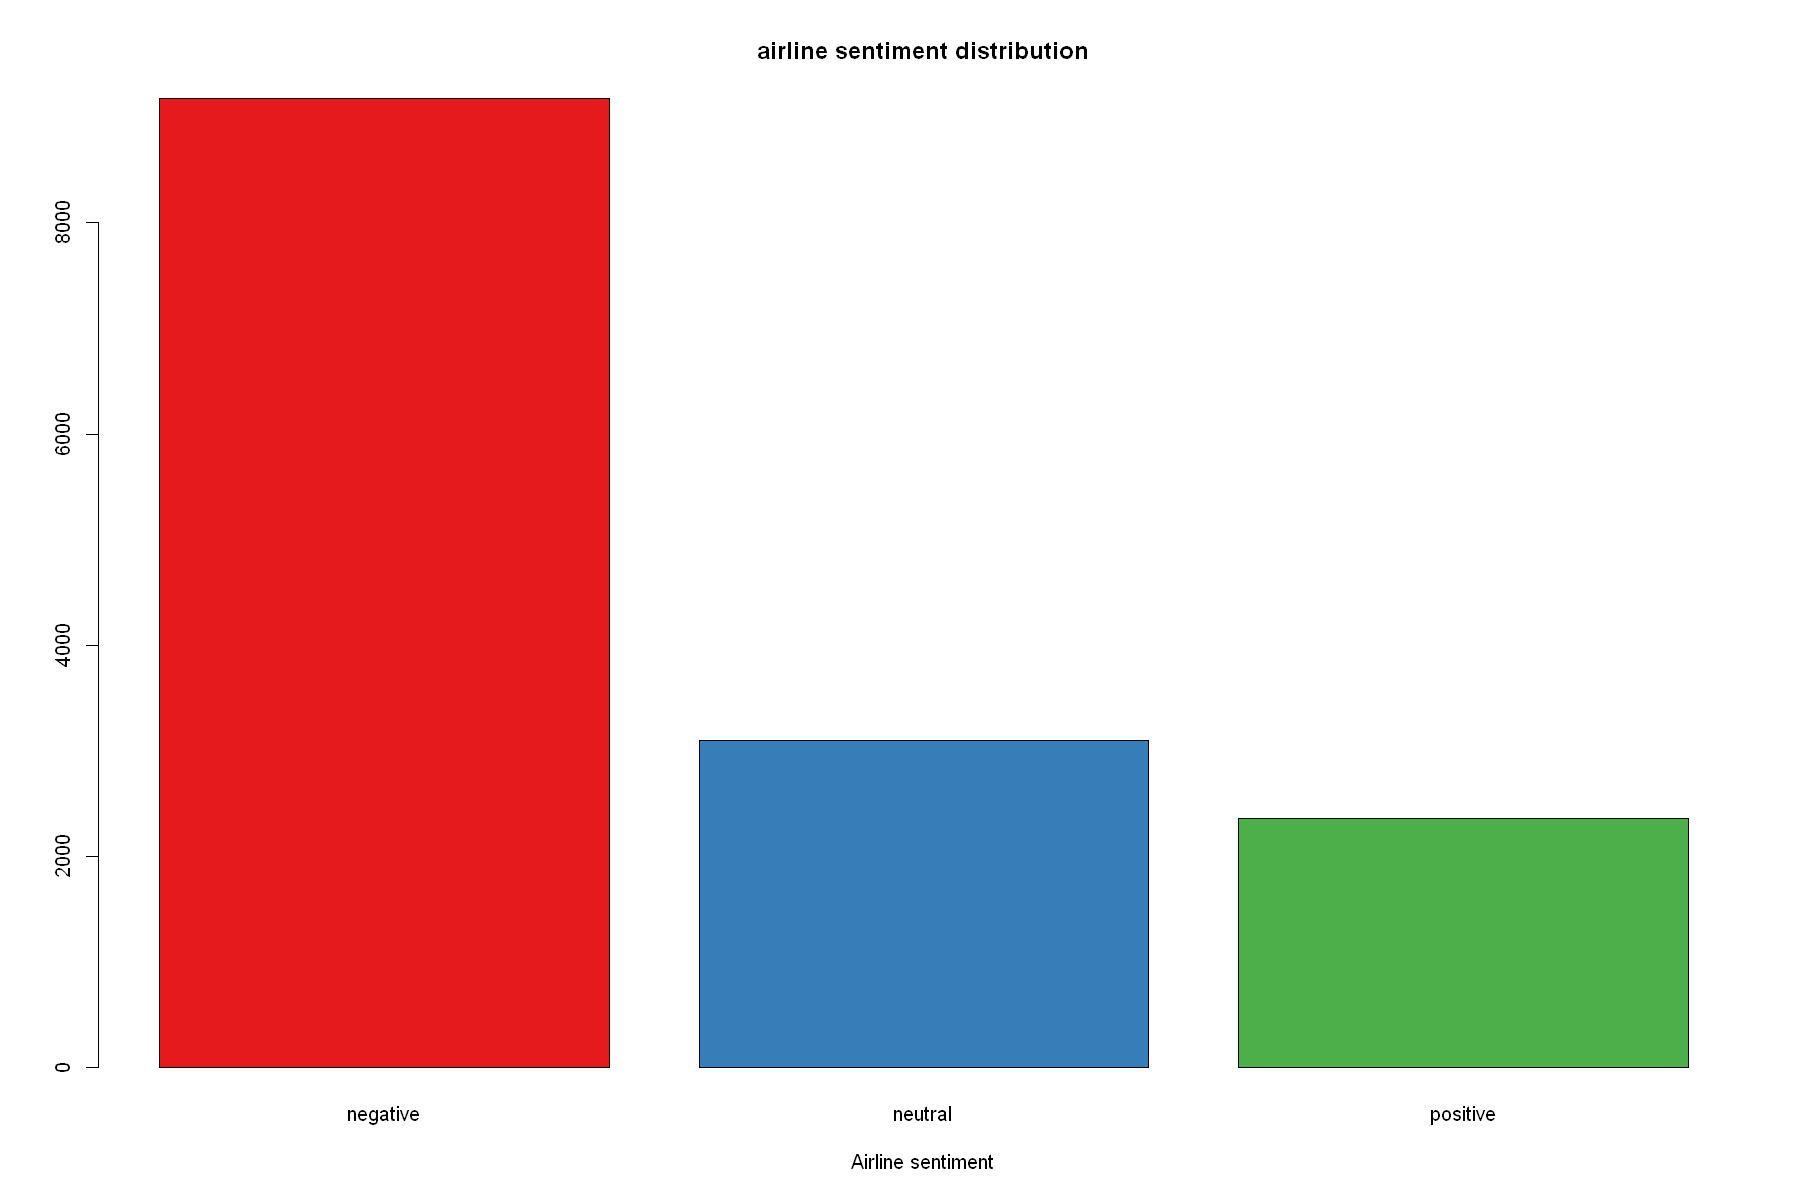

In [91]:
library(RColorBrewer)
coul <- brewer.pal(3, "Set1") 
# La distribution sentiments par rapport a chaque classe (positive, négative, neutre)
t = table(data$airline_sentiment)
barplot(t, main="airline sentiment distribution", xlab="Airline sentiment",col=coul)

    => Le jeu de données contient plus de sentiments négatifs que de sentiments positifs et neutres. 
     Comme certains tweets positifs et des tweets neutres ont pas pas une valeur de confiance de 1 
     (airline_sentiment_confidence) , nous pouvons affirmer qu'il y a plus de tweets négatifs.

###  La distribution des sentiments par rapport a chaque compagnie aérienne.

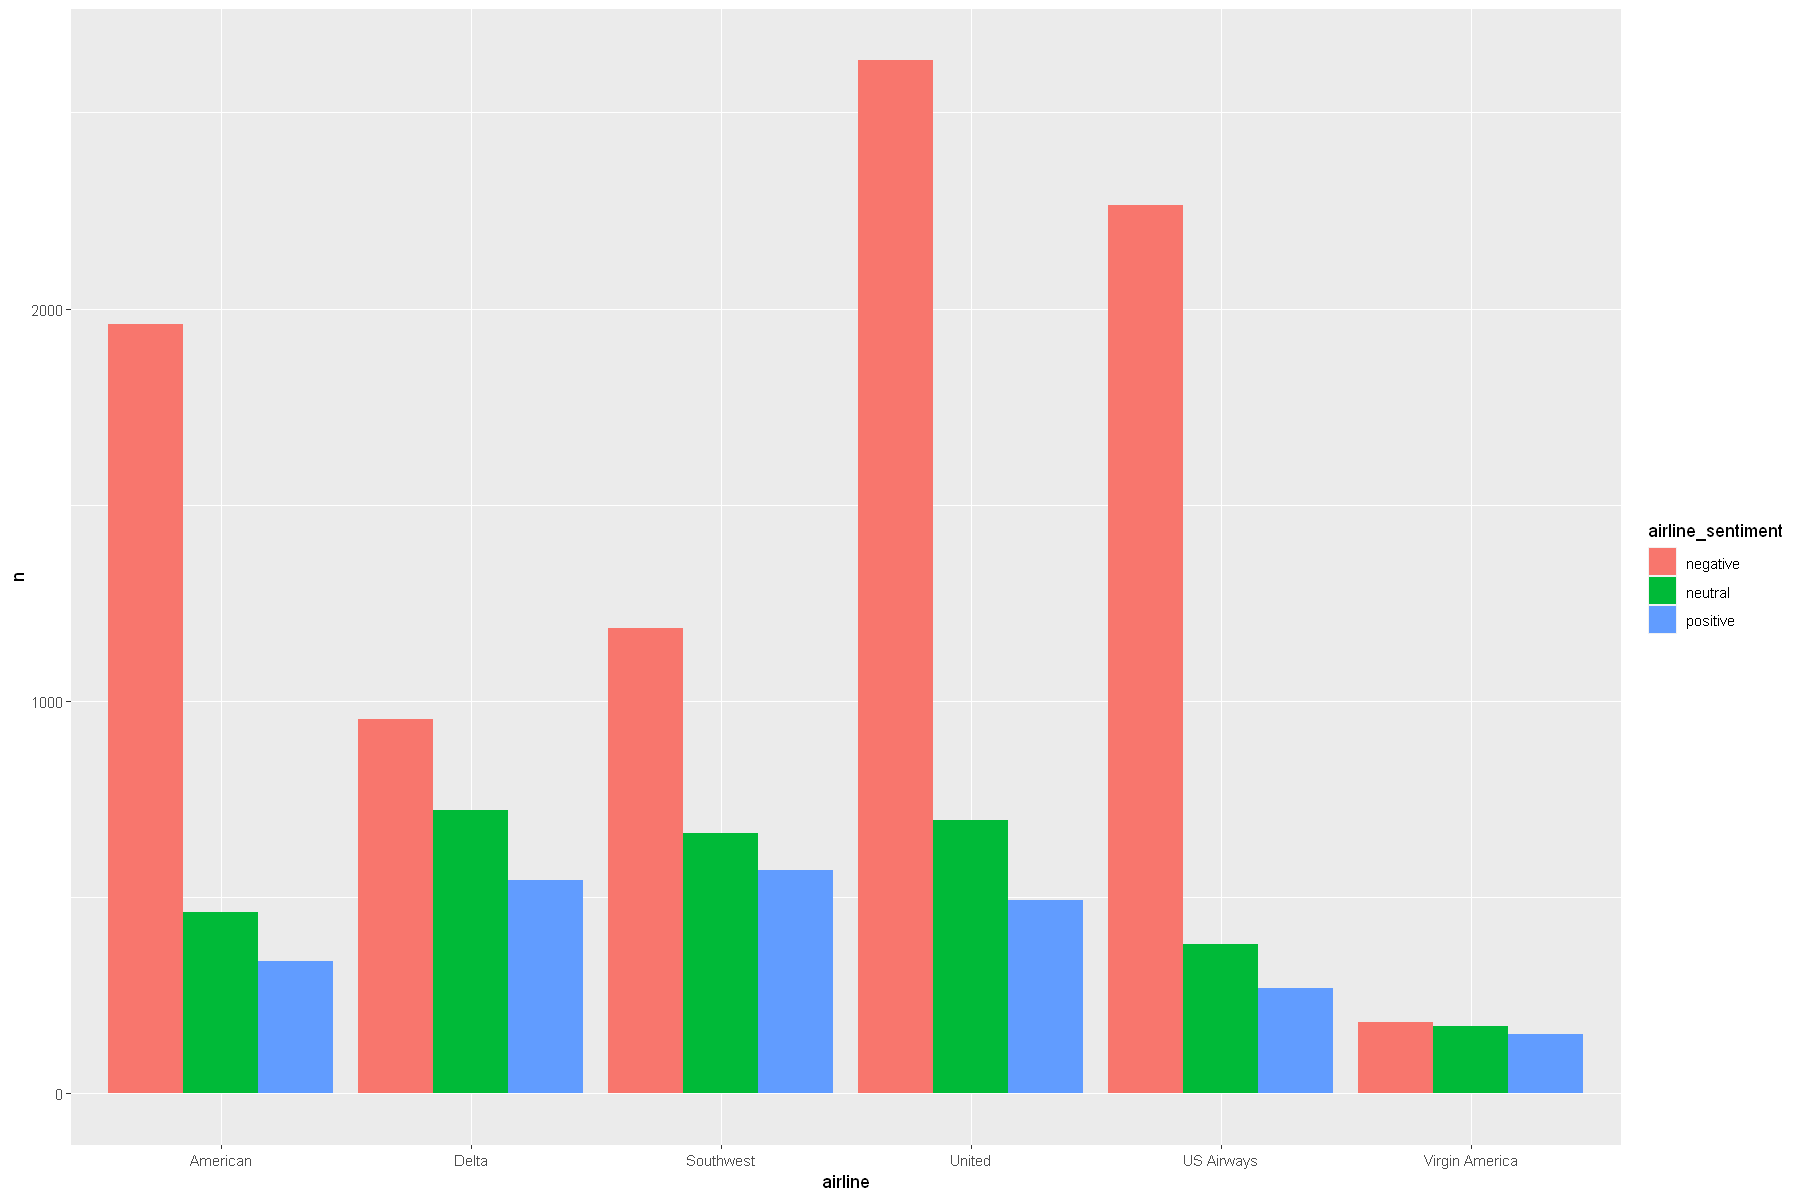

In [92]:
options(repr.plot.width=15, repr.plot.height=10)

# La distribution sentiments par rapport a chaque compagnie aérienne.
data_negativereason_exist <- data %>% filter(data$negativereason != "") 
count_airline_sentiment <- data %>% group_by(airline_sentiment, airline) %>% count()
ggplot(count_airline_sentiment, aes(fill=airline_sentiment, y=n, x=airline)) + 
    geom_bar(position="dodge", stat="identity")

    - Les compagnies aériennes les plus commentées négativement sont: United, US Airways et American.
    - Soutwest est la compagnie qui a plus des tweets positifs.
    - Virgin America receoit moins des tweets négatifs.

#### Les raisons des avis négatives

negativereason,n
<chr>,<int>
Bad Flight,580
Can't Tell,1190
Cancelled Flight,847
Customer Service Issue,2910
Damaged Luggage,74
Flight Attendant Complaints,481
Flight Booking Problems,529
Late Flight,1665
longlines,178


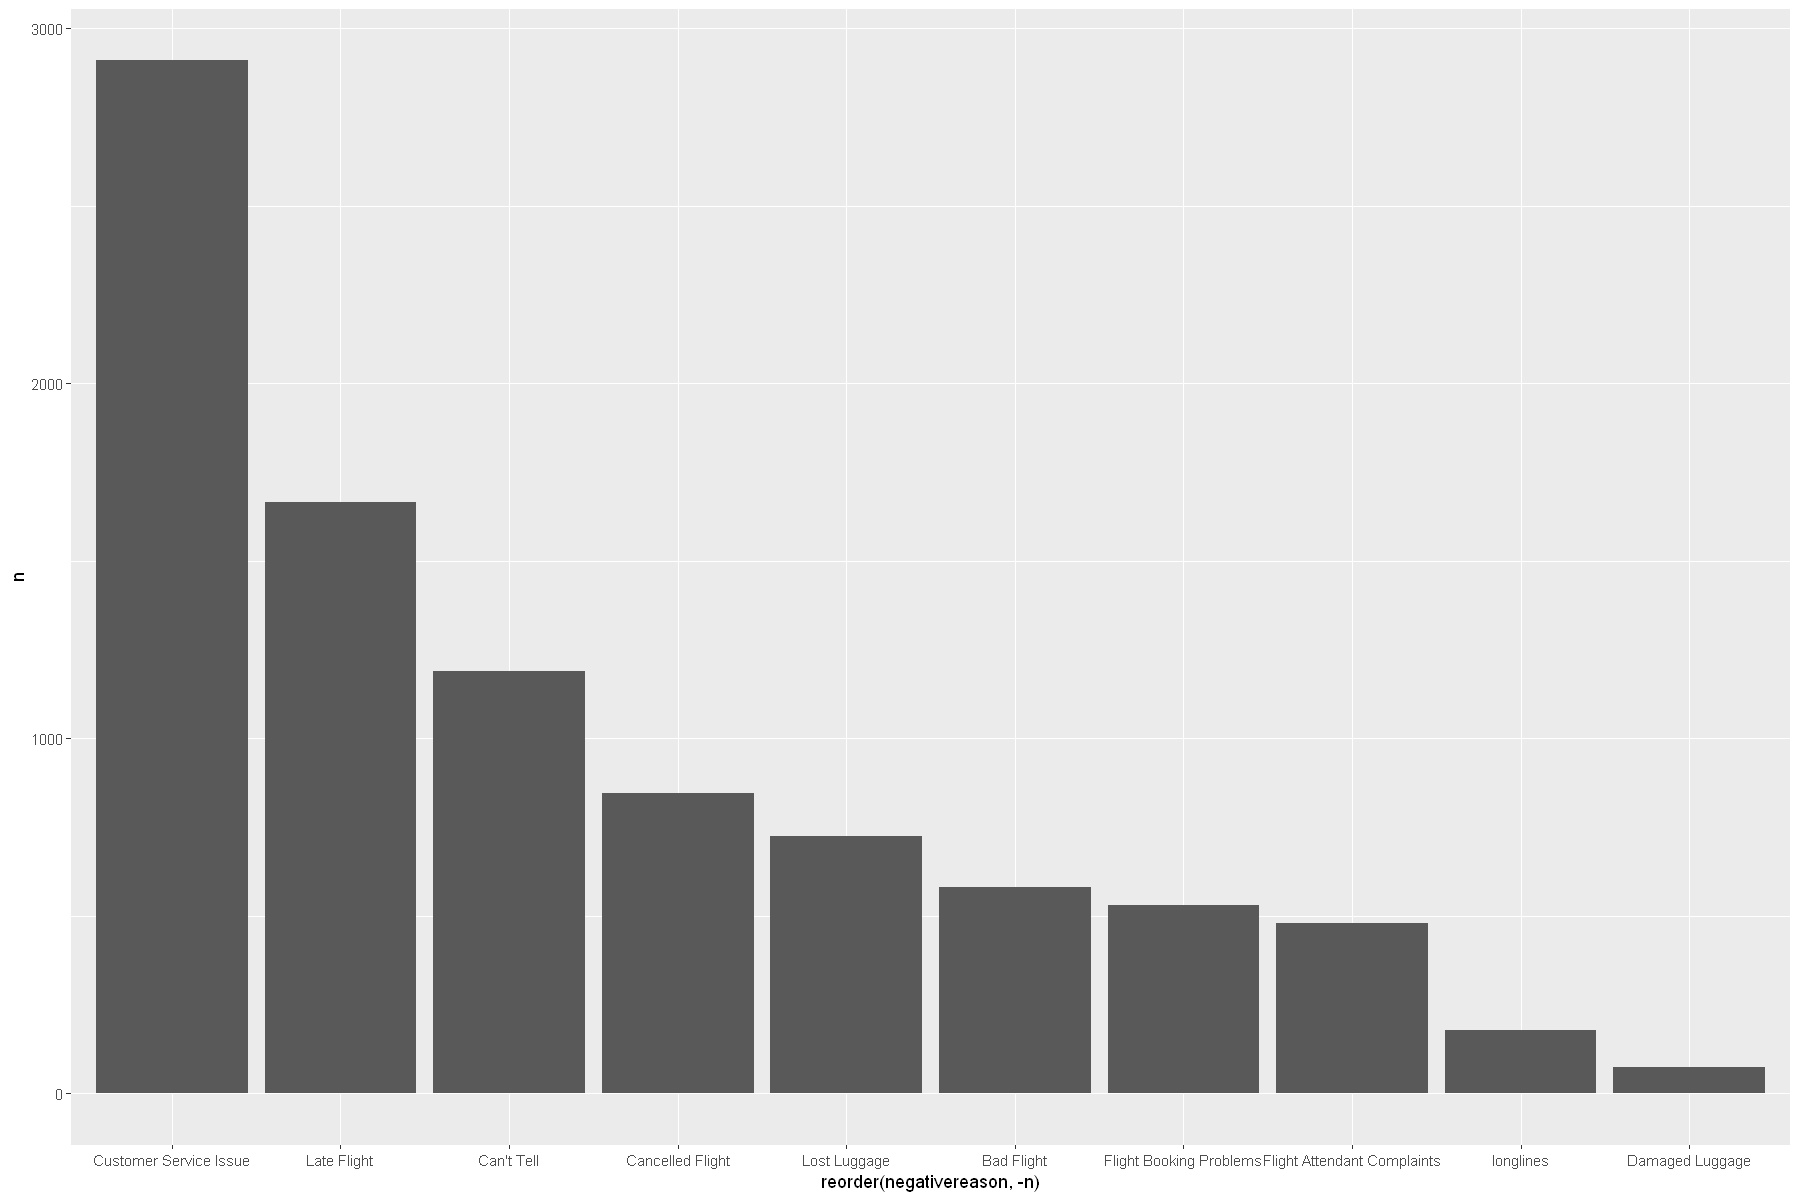

In [93]:
count_negative_reasons <- data_negativereason_exist %>% group_by(negativereason) %>% count()
count_negative_reasons
ggplot(count_negative_reasons, aes(y=n, x=reorder(negativereason, -n))) +
    geom_bar(position="dodge", stat="identity")

    Les tweets négatifs sont principalement liés aux raisons suivantes :
    1. Des problèmes dans le service client.
    2. Le retard des vols .
    3. L'annulation de vols.

#### - airline et negativereason

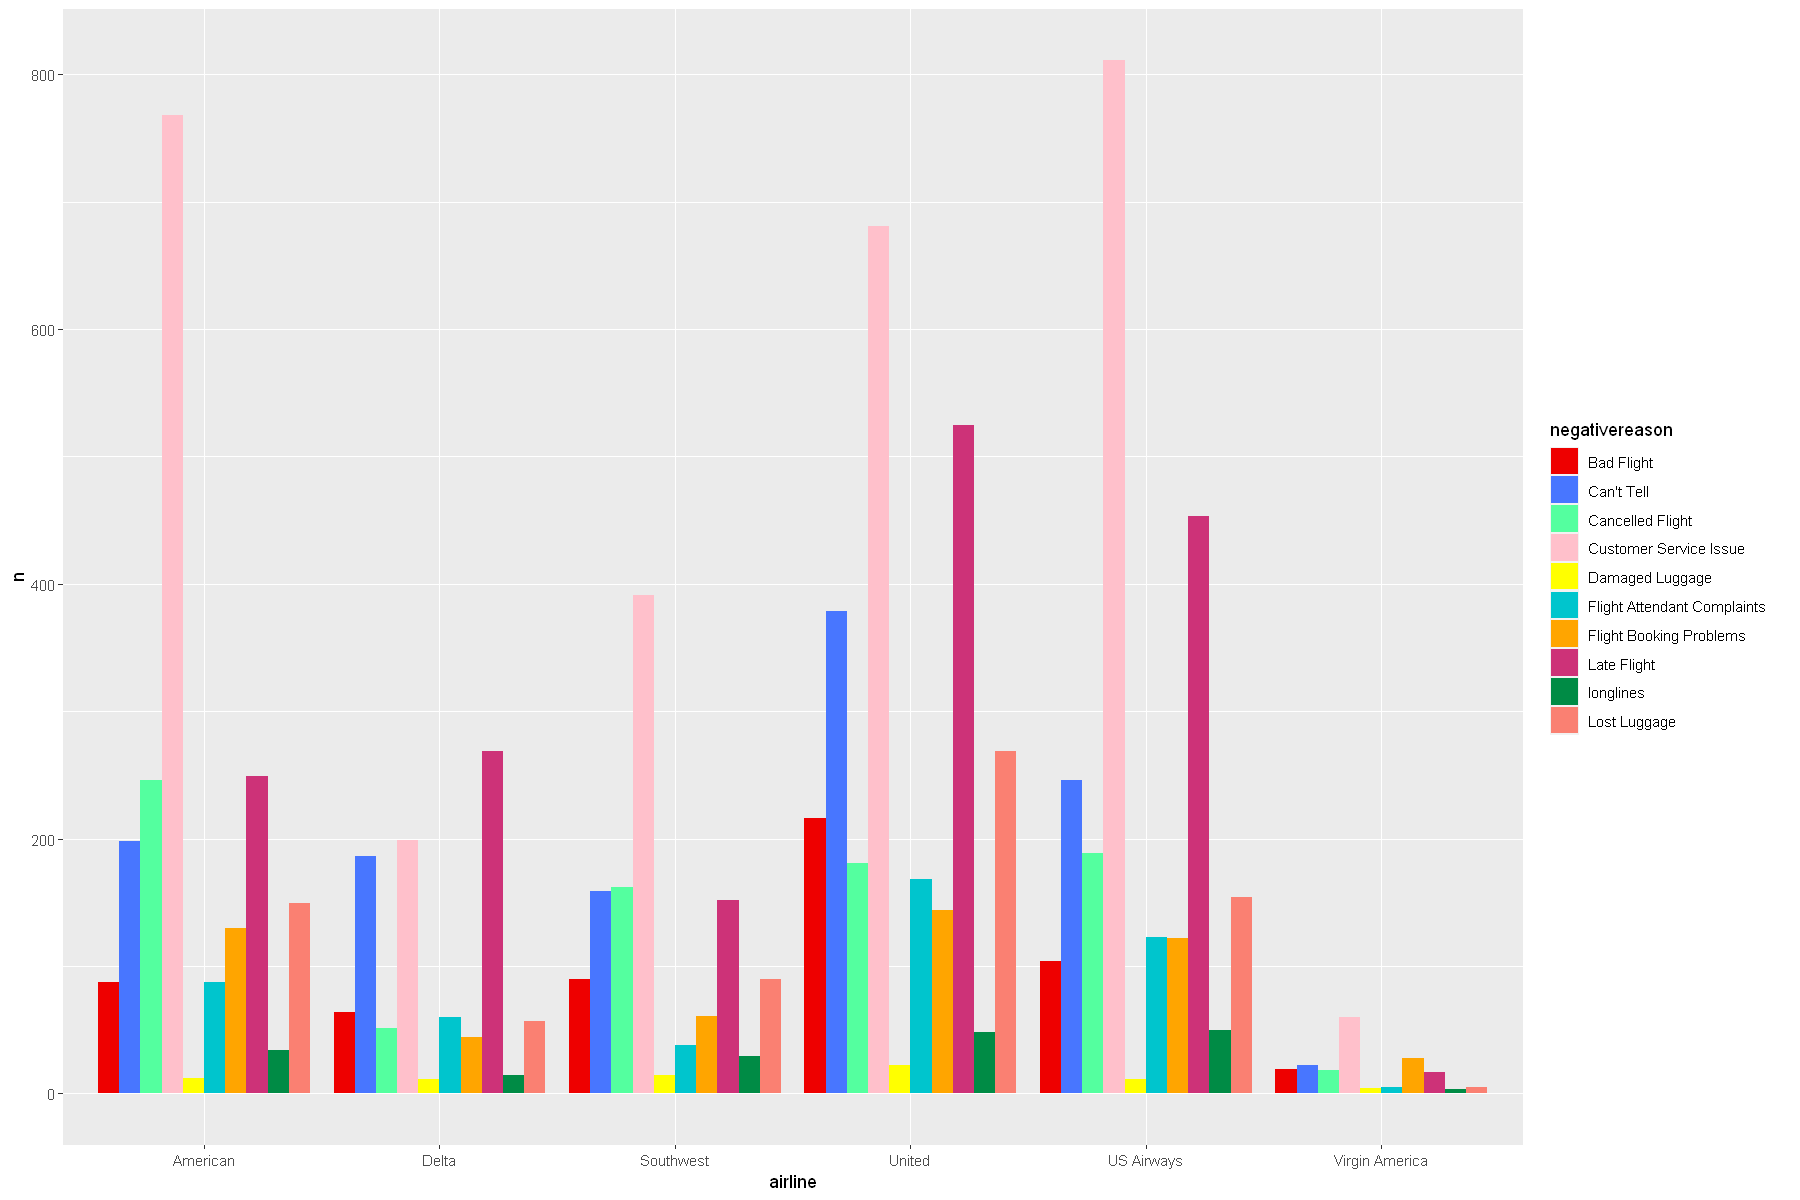

In [94]:
options(repr.plot.width=15, repr.plot.height=10)
data_negativereason_exist <- data %>% filter(data$negativereason != "") 
count_negativereason<- data_negativereason_exist %>% group_by(negativereason, airline) %>% count()
ggplot(count_negativereason, aes(fill=negativereason, y=n, x=airline)) + geom_bar(position="dodge",stat="identity") + 
    scale_fill_manual(values=c("red2", "royalblue1", "seagreen1","pink","yellow", "turquoise3", "orange","violetred3","springgreen4","salmon"))

# 2 - Nettoyage des données 

    Avant l'analyse des données, on peut effectuer les prétraitement suivants:
    - Les colonnes non utiles sont supprimées.
    - Les mots outils sont supprimés.
    - Les mots de même racine sont concaténés.
    - Les mots singuliers et pluriels sont regroupés.
    - Les conjugaisons des verbes sont concaténées
    - Les hashtags, les numéros sont supprimés.
    - L'effectif maximal des mots est 50.

## 2.1 - Suppression des  variables inutiles
    
    
    On veut supprimer les variables inutiles, donc on va sélectionner juste les variables utiles lors de l'analyse:
    - airline_sentiment
    - negativereason
    - airline
    - text

In [95]:
tweets <- select(data, airline_sentiment, negativereason, airline, text)
head(tweets)

,airline_sentiment,negativereason,airline,text
,<chr>,<chr>,<chr>,<chr>
1,neutral,,Virgin America,@VirginAmerica What @dhepburn said.
2,positive,,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.
3,neutral,,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!
4,negative,Bad Flight,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
5,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing about it
6,negative,Can't Tell,Virgin America,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing. it's really the only bad thing about flying VA


## 2.2 - Variable text

#####  2.2.1 - Supprimer le @airline du texte du tweet  

In [96]:
tweets$text <- gsub("@[a-zA-Z_-]+", " ", tweets$text)

####       - Regroupement de quelques mots 

In [97]:
tweets$text <-gsub("thanks", "thank", tweets$text, ignore.case = TRUE)
tweets$text <- gsub("&amp;", "", tweets$text)
tweets$text <- gsub("flightled", "flight", tweets$text)
tweets$text <- gsub("flights", "flight", tweets$text)
tweets$text <- gsub(c("hrs", "hours"), "hour", tweets$text)
head(tweets)


,airline_sentiment,negativereason,airline,text
,<chr>,<chr>,<chr>,<chr>
1,neutral,,Virgin America,What said.
2,positive,,Virgin America,plus you've added commercials to the experience... tacky.
3,neutral,,Virgin America,I didn't today... Must mean I need to take another trip!
4,negative,Bad Flight,Virgin America,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces they have little recourse"
5,negative,Can't Tell,Virgin America,and it's a really big bad thing about it
6,negative,Can't Tell,Virgin America,seriously would pay $30 a flight for seats that didn't have this playing. it's really the only bad thing about flying VA


#####  2.2.2 - diviser les tweets en 3 dataframes selon le sentiment positif , négatif ou neutre

In [98]:
positiveSubset = subset(tweets, airline_sentiment == "positive")
negativeSubset = subset(tweets, airline_sentiment == "negative")
neutralSubset = subset(tweets, airline_sentiment == "neutral")

##### 2.2.3 - Nettoyage de la variable text

In [129]:
# Ses mots sont fréquentes et inutiles donc on les supprime
wordsToRemove <- c('get', 'cant', 'can', 'now', 'just', 'will', 'dont', 'got', 'much','airline', 'ive','time',
                   'guys','today','jetblue','amp')



analyseText <- function(text_to_analyse){
    
    # Charger les données comme un corpus
    text <- Corpus(VectorSource(text_to_analyse))
    # Convertir le texte en minuscule
    text <- tm_map(text, content_transformer(tolower))
    # Supprimer les ponctuations
    text <- tm_map(text, removePunctuation)
    # Supprimer les mots wordsToRemove
    text <- tm_map(text, removeWords, wordsToRemove)
    # Supprimer les nombres
    text <- tm_map(text, removeNumbers)
    # Supprimer les mots vides anglais
    text <- tm_map(text, removeWords, stopwords("english"))
    text <- DocumentTermMatrix(text)
    # Conserve la matrice 97% sparse
    text <- removeSparseTerms(text, 0.97) 
    text <- as.data.frame(as.matrix(text))
    colnames(text) <- make.names(colnames(text)) 
    
    
    return(text)
}

##### 2.2.4 - Analyse des tweets positives

In [100]:
# Tableau disjonctif
positiveWords <- analyseText(positiveSubset$text)
head(positiveWords)

,amazing,good,great,thank,flight,awesome,love,best,customer,service,back,help
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0


In [101]:
head(positiveSubset)

,airline_sentiment,negativereason,airline,text
,<chr>,<chr>,<chr>,<chr>
2,positive,,Virgin America,plus you've added commercials to the experience... tacky.
7,positive,,Virgin America,"yes, nearly every time I fly VX this â€œear wormâ€ wonâ€™t go away :)"
9,positive,,Virgin America,"Well, I didn'tâ€¦but NOW I DO! :-D"
10,positive,,Virgin America,"it was amazing, and arrived an hour early. You're too good to me."
12,positive,,Virgin America,I &lt;3 pretty graphics. so much better than minimal iconography. :D
13,positive,,Virgin America,This is such a great deal! Already thinking about my 2nd trip to I haven't even gone on my 1st trip yet! ;p


In [102]:
dim(positiveWords) #=> (2363,12)

[1] 2363   12

In [103]:
pos_data <- positiveWords
pos_data <- cbind(pos_data, airline = positiveSubset[,"airline"])  
pos_data <- pos_data[,order(colnames(pos_data),decreasing=F)]

In [104]:
pos_data <- aggregate(.~airline , pos_data , sum)
head(pos_data)
#write.csv(pos_data,"pos_data.csv", row.names = FALSE)

,airline,amazing,awesome,back,best,customer,flight,good,great,help,love,service,thank
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,American,6,14,12,8,20,49,24,29,13,17,27,186
2,Delta,13,25,11,24,15,89,21,64,11,38,29,218
3,Southwest,22,30,16,32,26,107,20,55,19,47,35,241
4,United,19,13,16,12,28,101,28,39,26,9,36,241
5,US Airways,10,9,9,17,17,58,9,31,13,3,25,139
6,Virgin America,7,8,7,12,7,27,5,15,0,18,7,36


      => Idées prise à partir du tableau:
      Le mot "thanks" utilisé 241 fois (le plus grand effectif) pour "Southwest" et "United" donc le mot "thanks" est-il si 
      caractéristique de ces compagnies ?

#### Nuages de mots

In [105]:
freqWords_pos <- colSums(positiveWords)
freqWords_pos <- freqWords_pos[order(freqWords_pos, decreasing = T)]
head(freqWords_pos)

thank   flight    great  service     love customer 
    1061      431      233      159      132      113

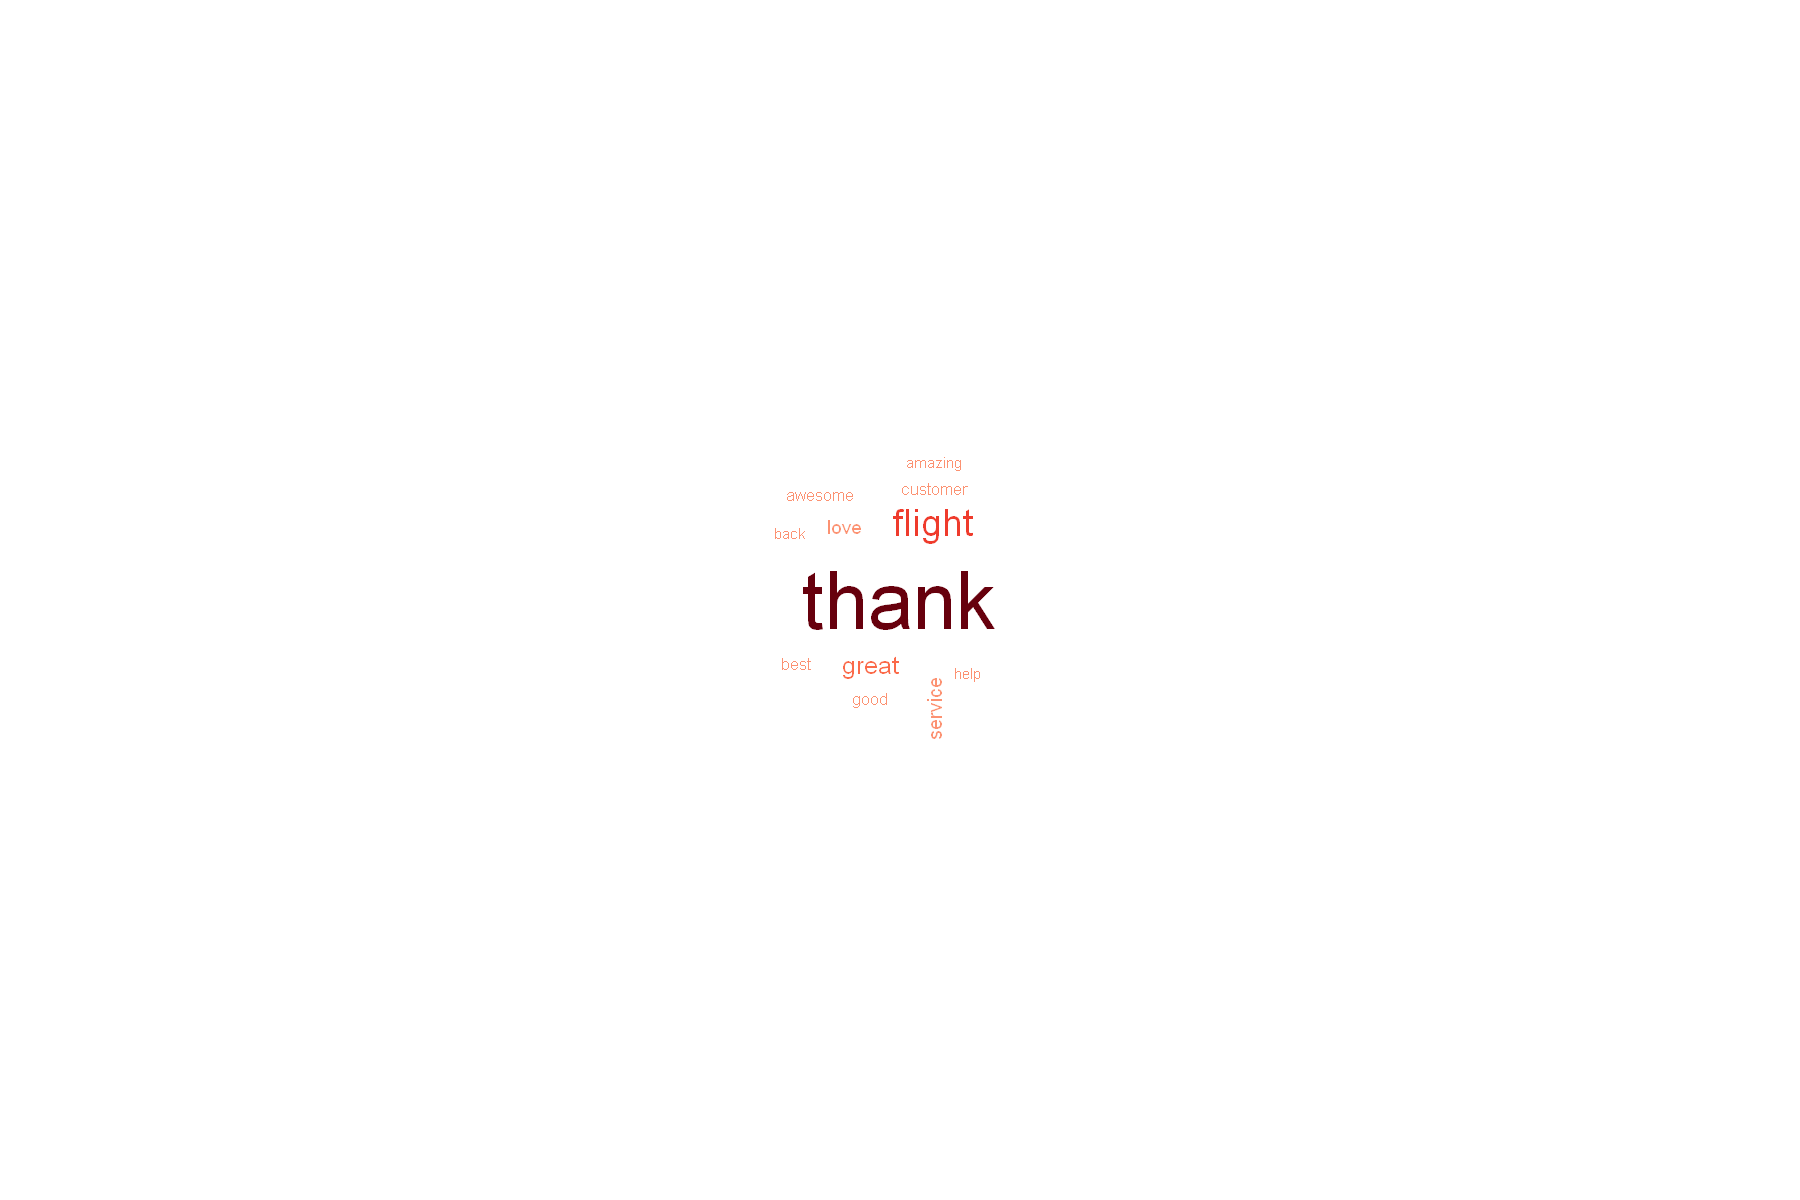

In [106]:
wordcloud(freq = as.vector(freqWords_pos), 
          words = names(freqWords_pos),
          random.order = FALSE,
          random.color = FALSE, 
          colors = brewer.pal(9, 'Reds')[4:9])

    Le nuages des mots montre que les mots les plus fréquemment utilisés sont "thanks" , "great" , "service","love", 
    "customer" autrement dit les clients ont une tendance à apprécier la compagnie aérienne sur les réseaux sociaux 
    lorsqu'ils ont une expérience de vol positive surtout par rapport à leur service client.

##### 2.2.5 - Analyse des tweets negatives

In [107]:
negativeWords <- analyseText(negativeSubset$text)
head(negativeWords)
dim(negativeWords) #=> (9178, 27)

,flight,still,help,hour,one,call,phone,trying,please,hold,...,delayed,late,cancelled,back,flightled,plane,hours,need,waiting,gate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[1] 9178   25

In [108]:
head(negativeSubset)

,airline_sentiment,negativereason,airline,text
,<chr>,<chr>,<chr>,<chr>
4,negative,Bad Flight,Virgin America,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces they have little recourse"
5,negative,Can't Tell,Virgin America,and it's a really big bad thing about it
6,negative,Can't Tell,Virgin America,seriously would pay $30 a flight for seats that didn't have this playing. it's really the only bad thing about flying VA
16,negative,Late Flight,Virgin America,SFO-PDX schedule is still MIA.
18,negative,Bad Flight,Virgin America,I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!
21,negative,Can't Tell,Virgin America,why are your first fares in May over three times more than other carriers when all seats are available to select???


In [109]:
neg_data <- negativeWords
neg_data <- cbind(neg_data, airline = negativeSubset[,"airline"])  
neg_data <- neg_data[,order(colnames(neg_data),decreasing=F)]

In [110]:
neg_data <- aggregate(.~airline , neg_data , sum)
head(neg_data)
#write.csv(neg_data,"neg_data.csv", row.names = FALSE)

,airline,back,bag,call,cancelled,customer,delayed,flight,flightled,gate,...,need,one,phone,plane,please,service,still,thank,trying,waiting
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,American,115,87,185,283,127,63,689,145,82,...,110,94,107,87,76,161,109,85,65,81
2,Delta,31,30,17,47,44,76,350,15,29,...,33,35,15,67,23,50,52,28,19,37
3,Southwest,43,36,44,203,90,48,488,97,32,...,49,66,62,43,51,93,43,46,40,26
4,United,85,168,55,171,180,175,882,78,144,...,73,128,53,165,76,223,137,121,62,99
5,US Airways,88,79,141,198,159,125,824,100,118,...,101,103,115,147,93,207,132,103,88,92
6,Virgin America,7,9,6,18,4,6,72,7,2,...,6,7,9,7,4,6,7,5,14,2


In [111]:
freqWords_neg <- colSums(negativeWords)
freqWords_neg <- freqWords_neg[order(freqWords_neg, decreasing = T)]
head(freqWords_neg)

flight cancelled      hour   service     hours      help 
     3305       920       740       740       653       610

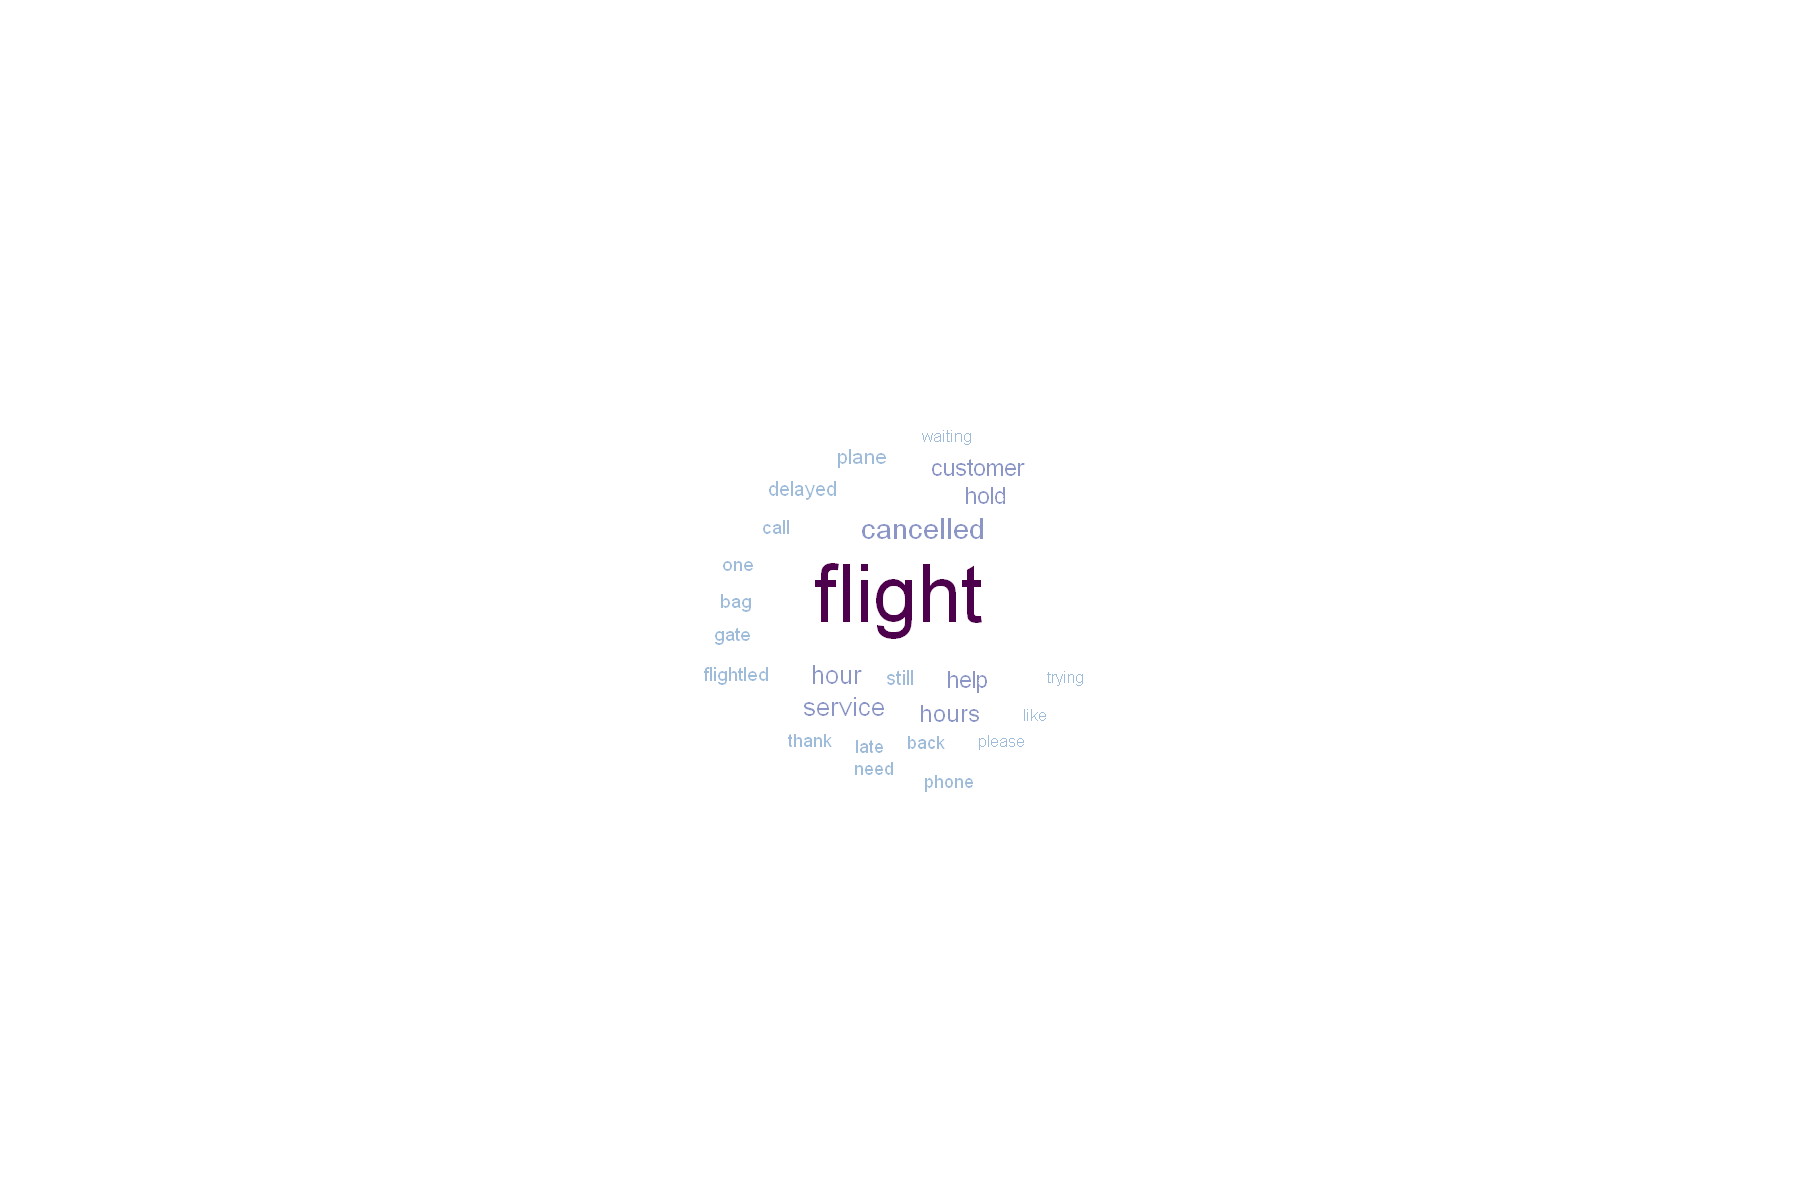

In [112]:
wordcloud(freq = as.vector(freqWords_neg), 
          words = names(freqWords_neg),
          random.order = FALSE,
          random.color = FALSE, 
          colors = brewer.pal(9, 'BuPu')[4:9])

    On voit que les mot les plus fréquentes sont 'flight','cancelled', 'hour', 'help' et 'service'.
    - Les mots 'flight' est 'cancelled' est souvent liés et utilisé pour décrire L'annulation des vols.
    - Le mot 'Hours' est utilisé par les client pour donner un sentiment négative sur le retard des vols.
    - Le mot 'service' pour décrire le mauvais service client.

##### 2.2.5 - Analyse des tweets neutres

In [113]:
neutralWords <- analyseText(neutralSubset$text)
head(neutralWords)
dim(neutralWords) #=> (3099, 11)

,need,know,flight,help,thank,please,cancelled,X.,tomorrow,fleek,fleets
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0


[1] 3099   11

In [114]:
freqWords_neutres <- colSums(neutralWords)
freqWords_neutres <- freqWords_neutres[order(freqWords_neutres, decreasing = T)]
head(freqWords_neutres)

flight  thank please   need   help  fleek 
   764    223    179    163    160    107

    Pour les commentaires neutres, les mots fréquents sont "thank", "please", "need", "help". Cela signifie que les clients
    donne des sentiments neutres car ces mots ne sont pas totalement positifs ou négatifs, au contraire les clients aiment 
    voir des changements de la part de ces compagnies aériennes.

## 3 - Analyse

### 3.1- AFC : Quelles compagnies aériennes sont les plus commentées négativement et positivement? 

    On applique l'AFC sur les variables : airline_sentiment et airline 
    On met en lignes les compagnies aériennes et en colonnes les modalités de la variable  airline_sentiment [negative, 
    positive, neutral], et on construit le tableau de contingence et faire l’étude pour répondre à la question suivante: 
    Quelles compagnies aériennes sont les plus commentées négativement et positivement? 

In [115]:
count_airline_sentiment <- tweets %>% group_by(airline, airline_sentiment) %>% count()

In [116]:
data1 <- read.csv("airline_by_airline_sentiment.csv")
data1

airline,negative,neutral,positive
<chr>,<int>,<int>,<int>
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
United,2633,697,492
US Airways,2263,381,269
Virgin America,181,171,152


In [117]:
res1.ca<-CA(data1,quali.sup=c(1),graph=F)
res1.ca

**Results of the Correspondence Analysis (CA)**
The row variable has  6  categories; the column variable has 3 categories
The chi square of independence between the two variables is equal to 1154.028 (p-value =  1.184312e-241 ).
*The results are available in the following objects:

   name               description                                
1  "$eig"             "eigenvalues"                              
2  "$col"             "results for the columns"                  
3  "$col$coord"       "coord. for the columns"                   
4  "$col$cos2"        "cos2 for the columns"                     
5  "$col$contrib"     "contributions of the columns"             
6  "$row"             "results for the rows"                     
7  "$row$coord"       "coord. for the rows"                      
8  "$row$cos2"        "cos2 for the rows"                        
9  "$row$contrib"     "contributions of the rows"                
10 "$quali.sup$coord" "coord. for supplementary categoric

    Pour interpréter l’AFC, Il faut tout d'abord évaluer s’il existe une dépendance significative entre les lignes et les 
    colonnes.
    => L'association est très significative car le test d'independance de chi_deux = 1154.028 (p-value =  1.184312e-241).

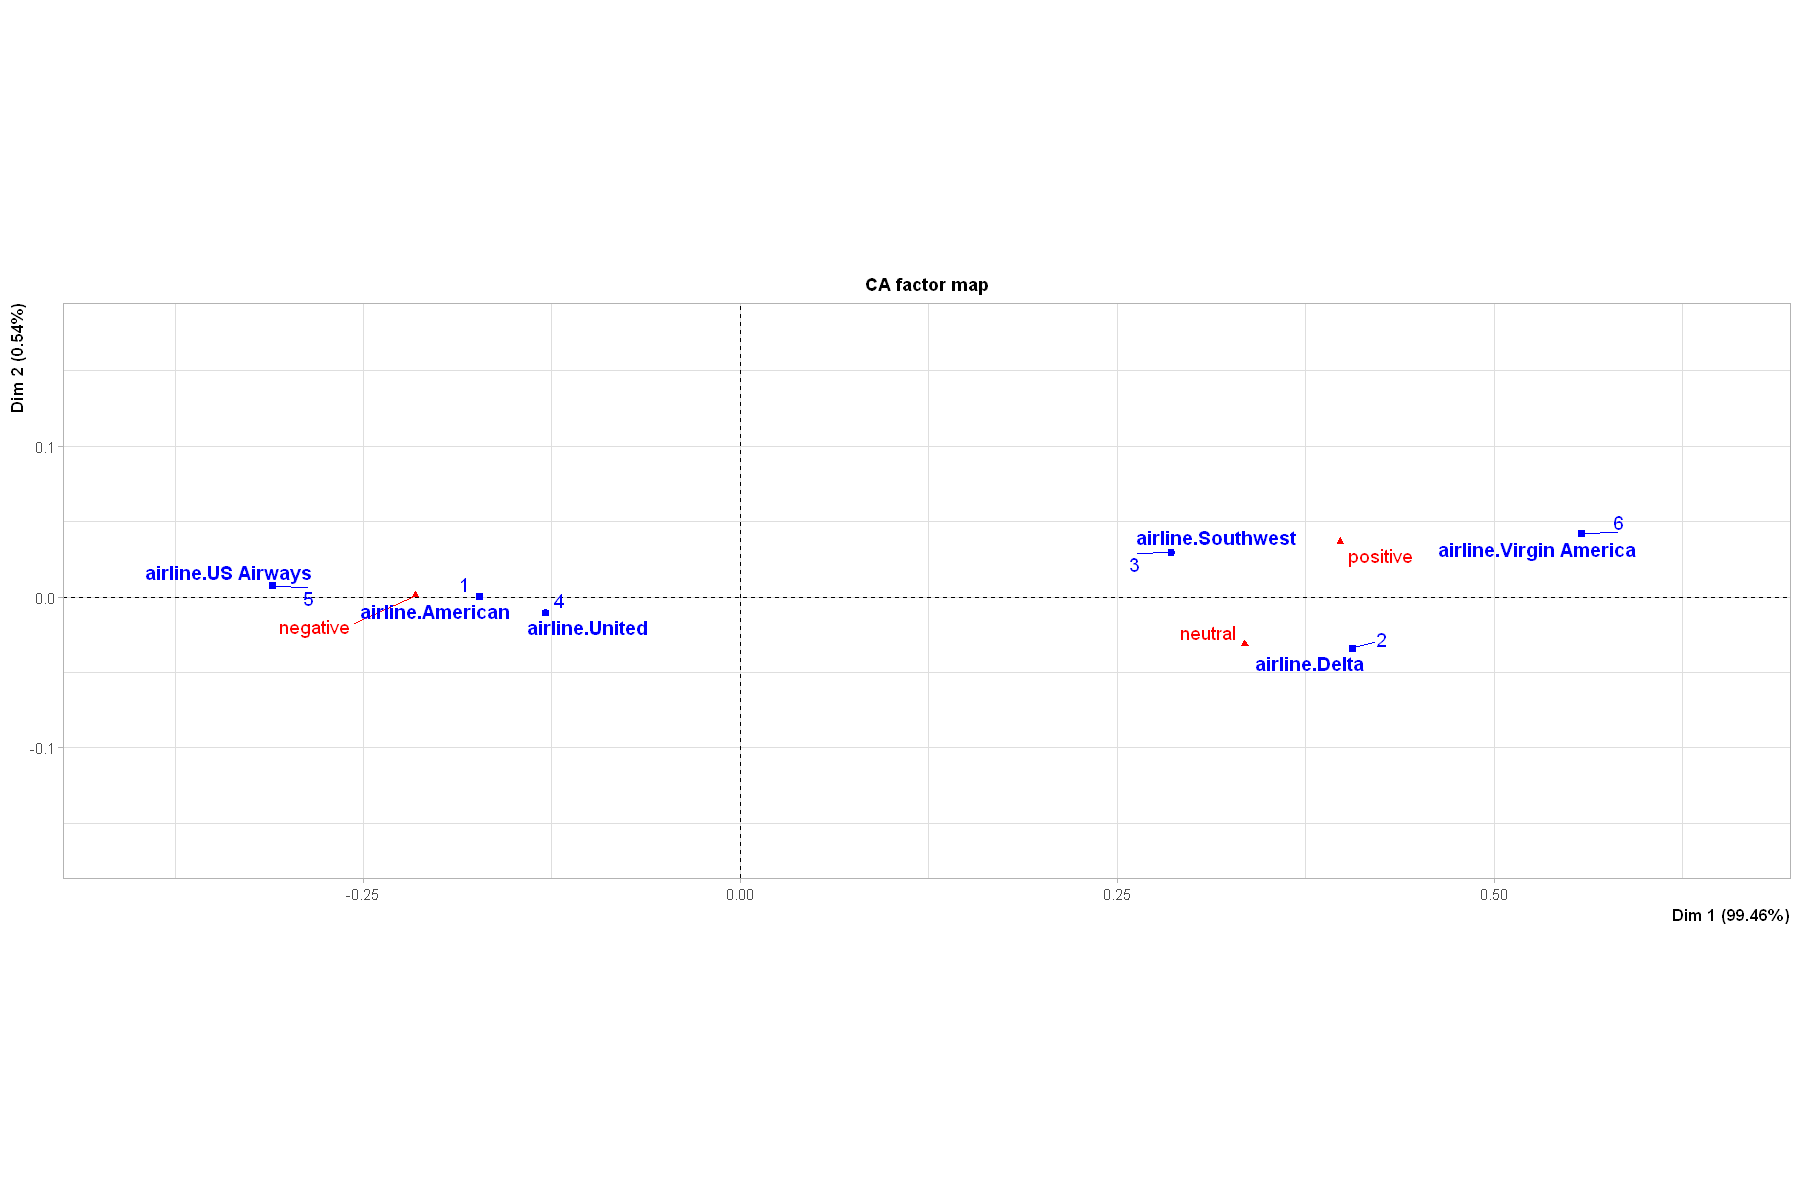

In [118]:
plot.CA(res1.ca,col.quali.sup='blue')

### - Intérpretations
    - Les compagnies avec un profil similaire sont reproupées.
    - Les compagnies qui sont loin de l’origine sont bien représentés sur le graphique ( Virgin America par exemple).
    - Les commentaires négatifs sont associés le plus aux compagnies aériennes "Us Airways", "American" et "United"
    - Les commentaires positifs sont associés le plus à "Virgin America"
    - Les commentaires neutres sont associés le plus à "Southwest" et "Delta"

### 3.2 - AFC  -  Analyse des tweets négatifs

      On applique les variables « airline » et « texte ». On construit un tableau lexical, on met en lignes les compagnies 
      aériennes et en colonnes les mots qui représente un sentiment négatif extraits à partir du variable "texte".Ce 
      tableau présente le nombre de fois que chaque mot a été utilisé par les clients pour décrire leur expérience dans les 
      vols.

In [119]:
neg_data

airline,back,bag,call,cancelled,customer,delayed,flight,flightled,gate,...,need,one,phone,plane,please,service,still,thank,trying,waiting
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
American,115,87,185,283,127,63,689,145,82,...,110,94,107,87,76,161,109,85,65,81
Delta,31,30,17,47,44,76,350,15,29,...,33,35,15,67,23,50,52,28,19,37
Southwest,43,36,44,203,90,48,488,97,32,...,49,66,62,43,51,93,43,46,40,26
United,85,168,55,171,180,175,882,78,144,...,73,128,53,165,76,223,137,121,62,99
US Airways,88,79,141,198,159,125,824,100,118,...,101,103,115,147,93,207,132,103,88,92
Virgin America,7,9,6,18,4,6,72,7,2,...,6,7,9,7,4,6,7,5,14,2


In [120]:
res2.ca<-CA(neg_data,quali.sup=c(1),graph=F)
res2.ca

**Results of the Correspondence Analysis (CA)**
The row variable has  6  categories; the column variable has 25 categories
The chi square of independence between the two variables is equal to 995.1714 (p-value =  8.494593e-138 ).
*The results are available in the following objects:

   name               description                                
1  "$eig"             "eigenvalues"                              
2  "$col"             "results for the columns"                  
3  "$col$coord"       "coord. for the columns"                   
4  "$col$cos2"        "cos2 for the columns"                     
5  "$col$contrib"     "contributions of the columns"             
6  "$row"             "results for the rows"                     
7  "$row$coord"       "coord. for the rows"                      
8  "$row$cos2"        "cos2 for the rows"                        
9  "$row$contrib"     "contributions of the rows"                
10 "$quali.sup$coord" "coord. for supplementary categori

### 3.2.1 - Visualisation et interprétation

#### a - Significativité statistique
     L'association est très significative car le test d'independance de chi_deux = 985.4679 (p-value =  2.916651e-138 ).

#### b - Valeurs propres / Variances

In [121]:
eig.val <- get_eigenvalue (res2.ca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,0.039914439,59.817229,59.81723
Dim.2,0.011464375,17.180929,76.99816
Dim.3,0.007748440,11.612094,88.61025
Dim.4,0.004812709,7.212500,95.82275
Dim.5,0.002787366,4.177248,100.00000


    La première et la deuxième dimension vont expliquer 77.12% de l’information, cette valeur est supérieure à la valeur 
    référence 75% ce qui est acceptable.

#### c - Pourcentage des variances

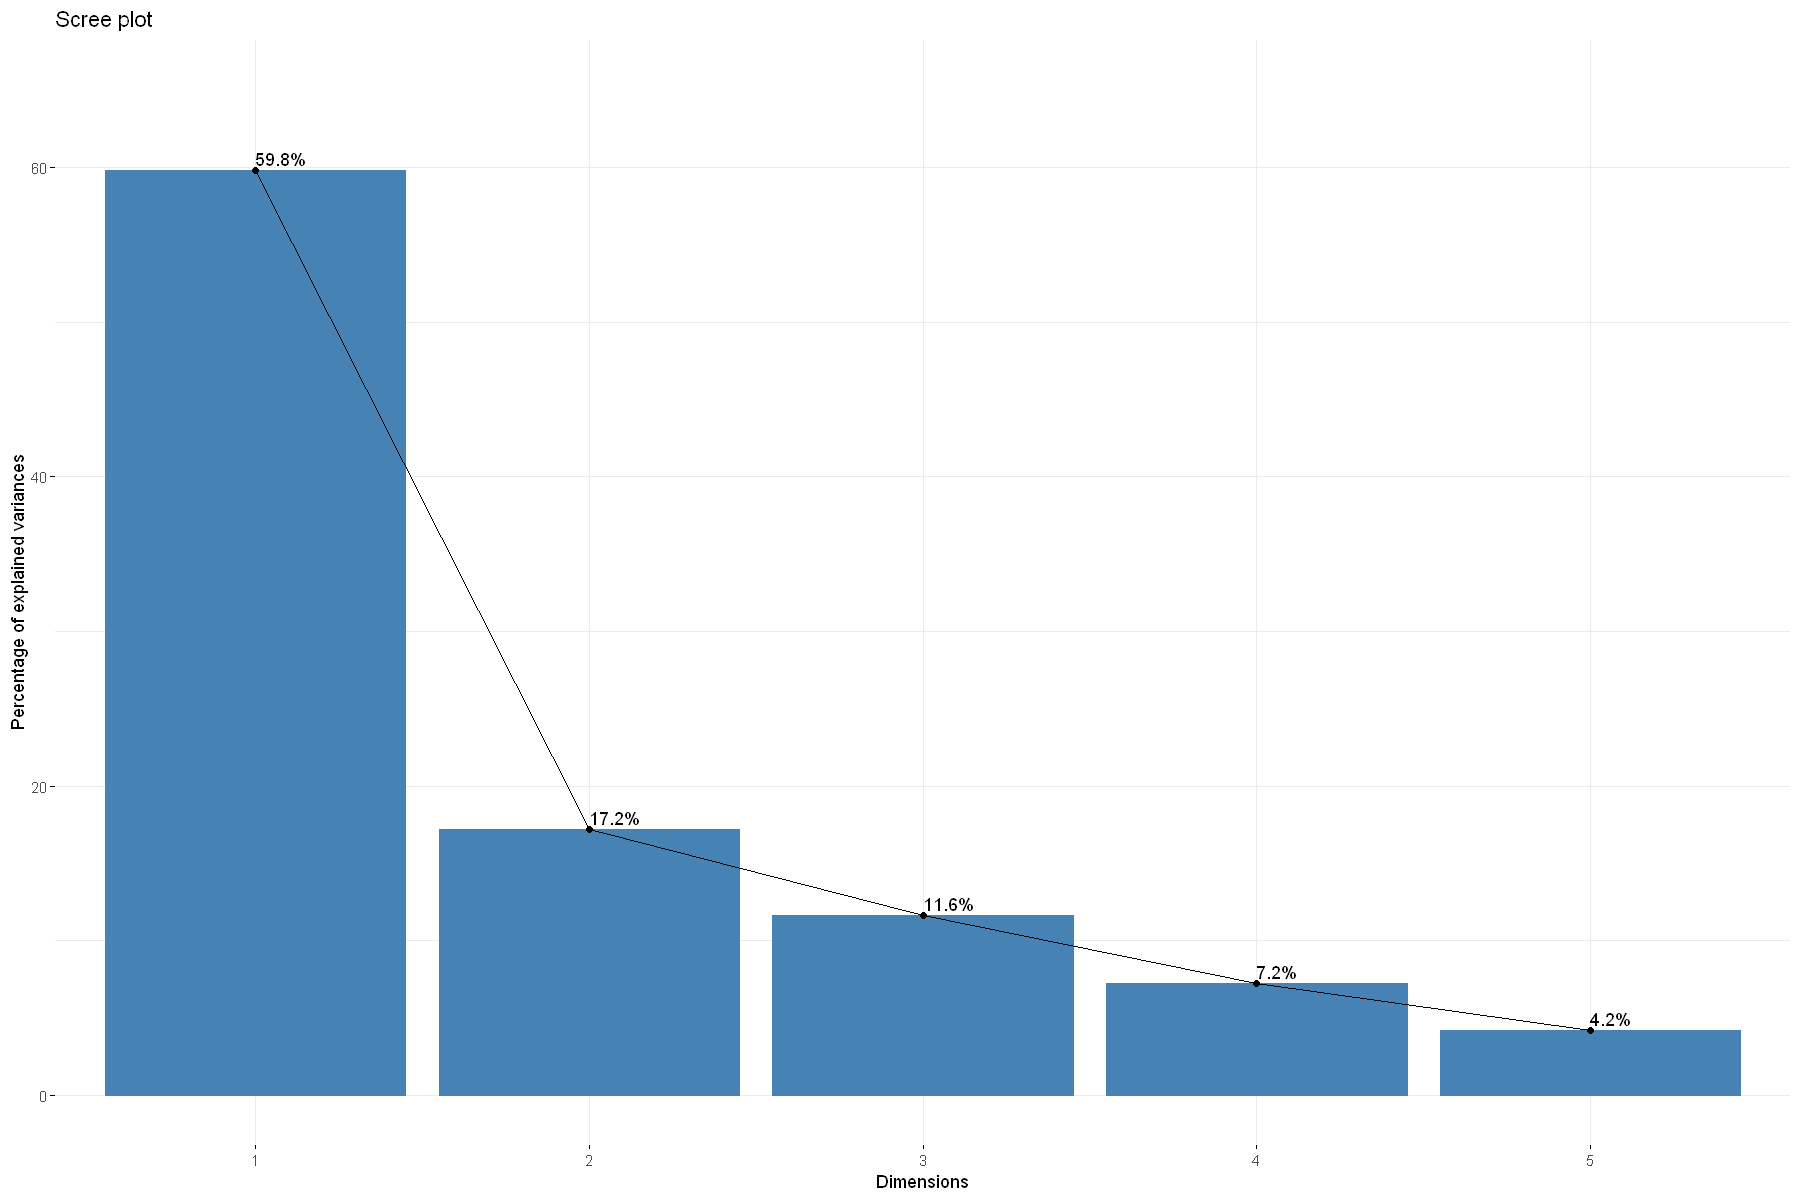

In [122]:
fviz_eig(res2.ca, addlabels = TRUE, ylim = c(0, 65))

#### d - Graphe CA

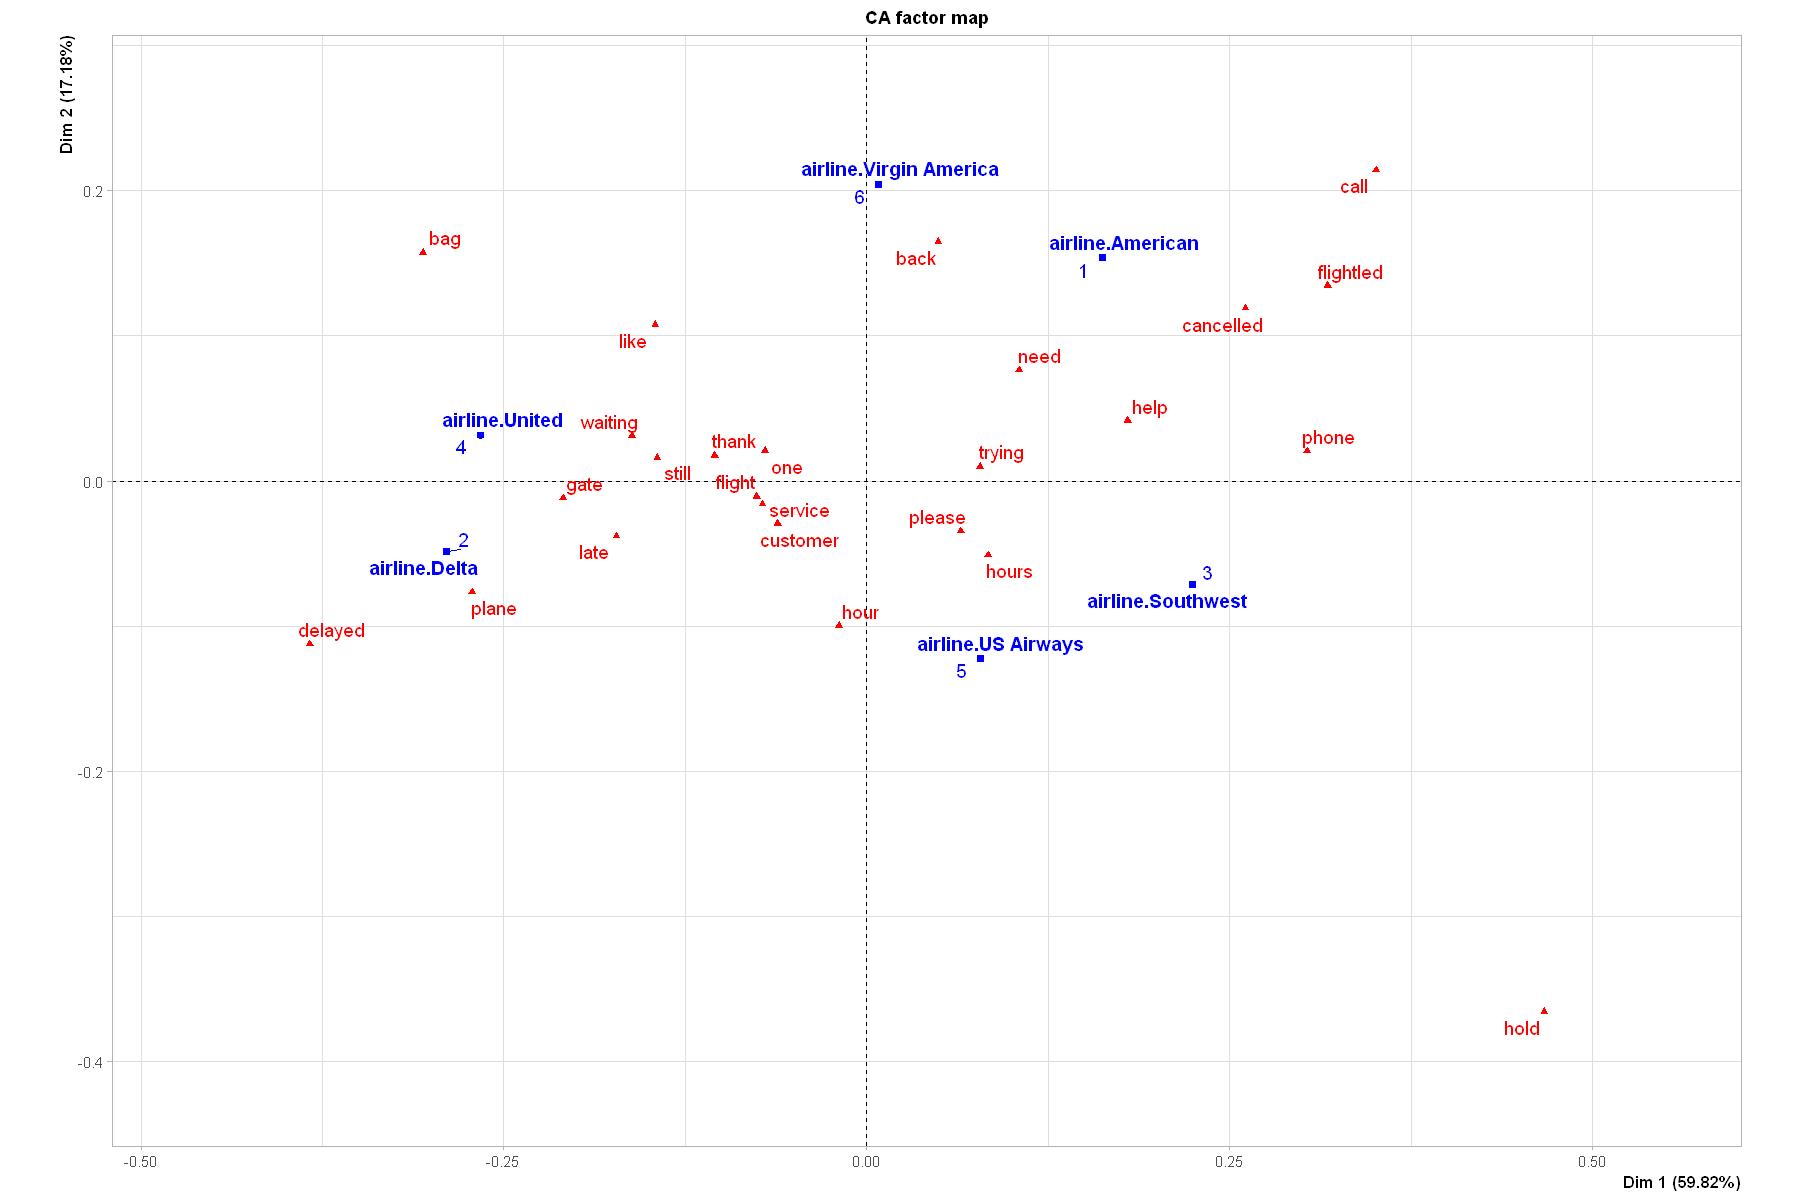

In [123]:
plot.CA(res2.ca,col.quali.sup='blue')

### - Intérpretations
    Le graphique montre que:
    - Le mot "cancelled" est associé le plus à la compagnie aérienne "American", cela signifie que la plupart des clients 
    expriment leur mauvaise expérience dans cette compagnie par l'annulation des vols..
    - Le mot "waiting" sont associés le plus à la compagnie aérienne "United" et Les mots "delayed" et "late" associé plus 
    à "Delta" et le mot "hours" est proche de "Us Airways". (raison négatif: Retard des vols)
    - Les mots "customer" et "service" sont proches donc liées, car on trouve toujour ces mots ensemble.
    => En résumé, la plupart des clients interrogent les compagnies aériennes sur leurs vols annulés, leur retard et leur 
    service client.
  

#### e-  Coordonnées des points colonnes ( les mots)

In [124]:
col <- get_ca_col(res2.ca)
head(col$coord)

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
back,0.04939822,0.16484301,0.06317049,-0.06017107,-0.023370111
bag,-0.30566999,0.15734254,-0.02551855,0.14598291,0.069484907
call,0.35104619,0.21419622,0.28065533,-0.05187892,-0.005276335
cancelled,0.26088904,0.11912087,-0.14892423,0.01877451,-0.051532259
customer,-0.06141835,-0.02954017,-0.01581447,0.10122241,-0.040962204
delayed,-0.38385222,-0.11233003,-0.01948916,-0.07987057,-0.045478065


#### f - Qualité de représentation des colonnes

In [125]:
head(col$cos2)

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
back,0.06460533,0.71942712,0.105651155,0.095856428,0.0144599660
bag,0.64445706,0.17075785,0.004491594,0.146991568,0.0333019249
call,0.49175326,0.18308060,0.314315140,0.010739908,0.0001110922
cancelled,0.63350242,0.13207248,0.206427398,0.003280754,0.0247169546
customer,0.22428542,0.05188368,0.014870107,0.609197379,0.0997634152
delayed,0.87294458,0.07475673,0.002250323,0.037794804,0.0122535666


In [126]:
head(res2.ca$row$cos2)

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
1,0.4943165381,0.44506623,0.048802623,2.262374e-03,0.0095522351
2,0.6666604671,0.01888294,0.004310506,2.713166e-01,0.0388294584
3,0.5803870647,0.05887237,0.343717076,6.891966e-03,0.0101315258
4,0.9190571117,0.01307022,0.004602456,6.255500e-02,0.0007152187
5,0.2097738762,0.51397271,0.247638750,1.627767e-05,0.0285983824
6,0.0002477612,0.16591981,0.194902630,1.680255e-01,0.4709043076


## 3.3 - Classification ascendante héarchique

    La classification ascendante hiérarchique (CAH) permet d'identifier les groupes d’observations similaires dans un 
    jeu de données.dans notre cas on cherche les associations entre les mots.

#### a - Pour les tweets positifs

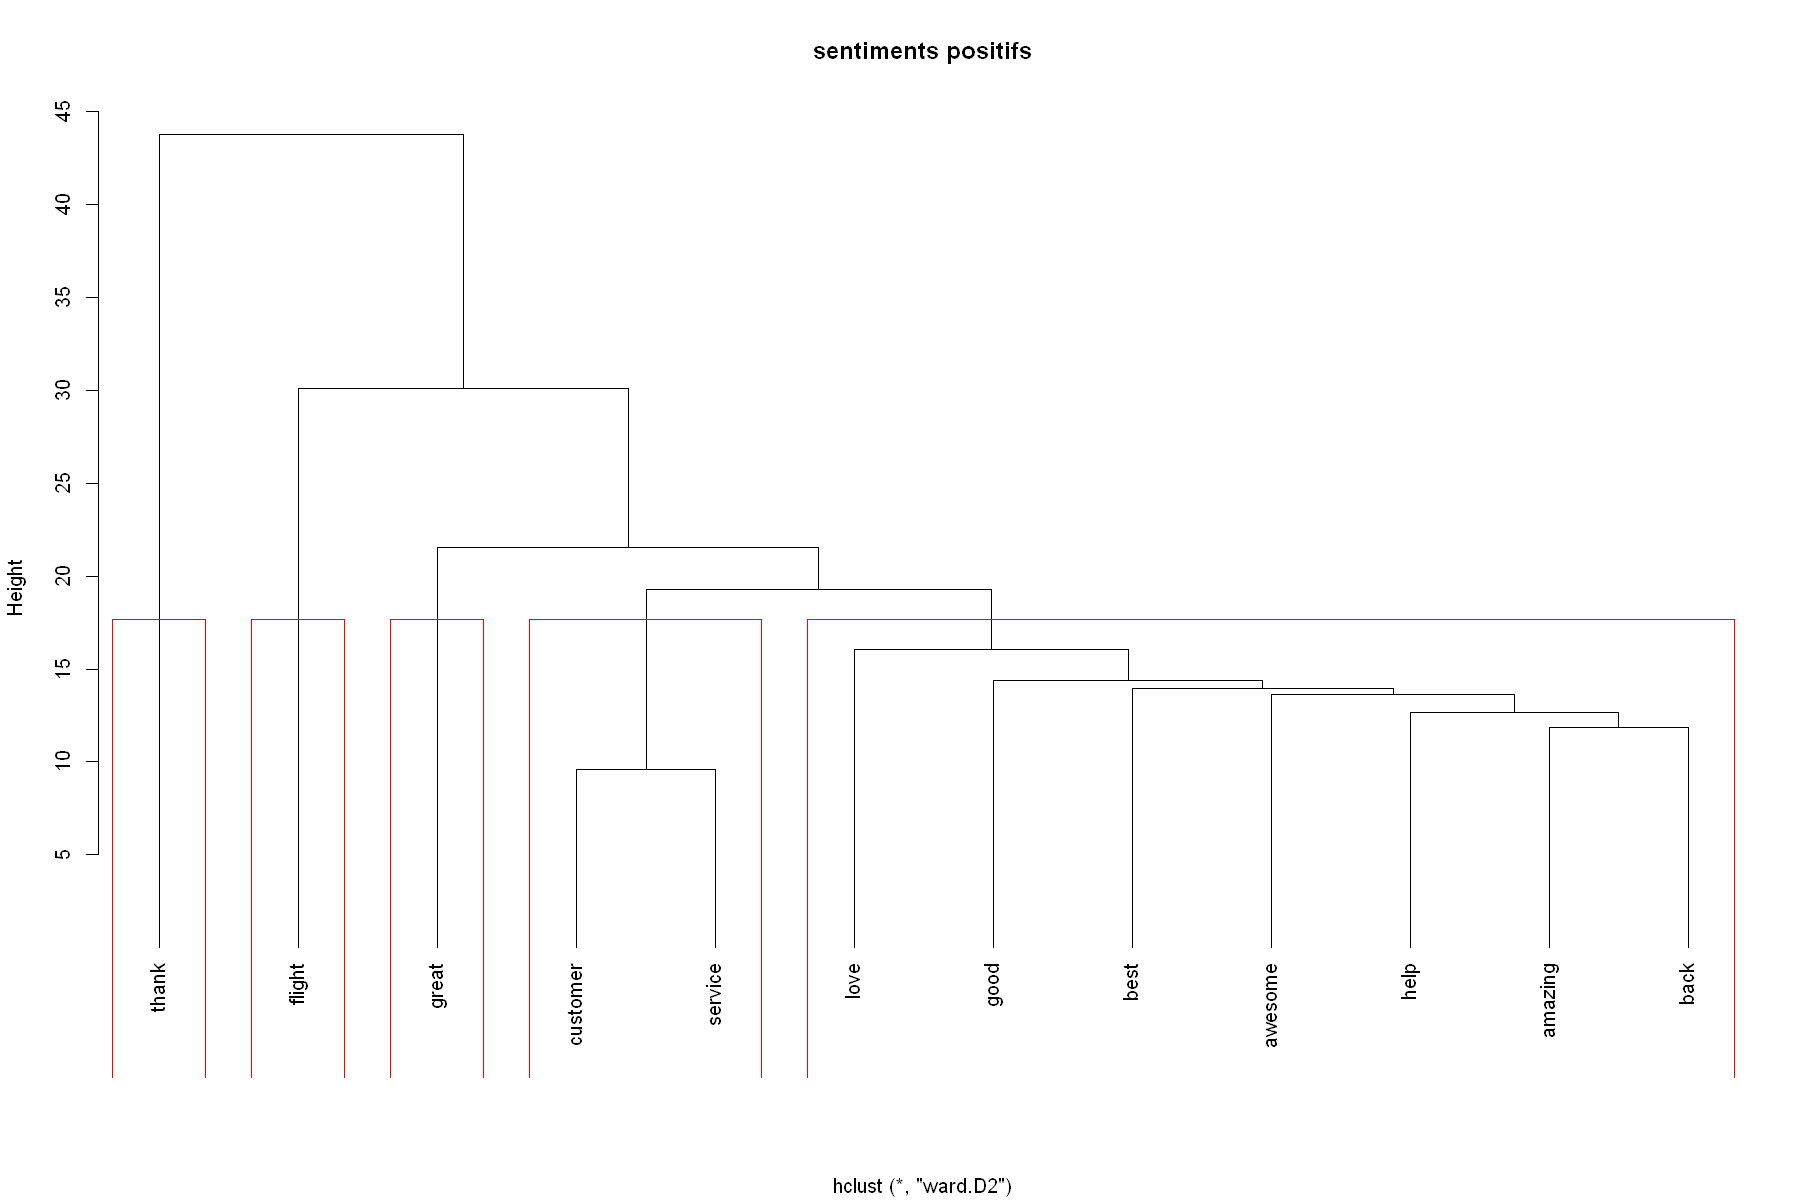

In [127]:
# hierarchical clustering
d <- dist(t(as.matrix(positiveWords)), method = 'euclidean')
fit <- hclust(d = d, method = 'ward.D2')


plot.new()
plot(fit, hang=-1, main = 'sentiments positifs', xlab = '')
rect.hclust(fit, k=5, border="red")

    L'arbre issu de la classification ascendante hiérarchique, pour les tweets positifs est composé de 5 groupes et montre:
    
    - Une association forte entre les mots customer et service qui sont dans la même classe.
    
    - Les mots du groupe love good best ... sont associés, car ils expriment des sentiments positifs. parfois ils peuvents 
    être utilisé pour exprimer la qualité de service client d'un compagnie aériennes

#### b - Pour les tweets négatifs

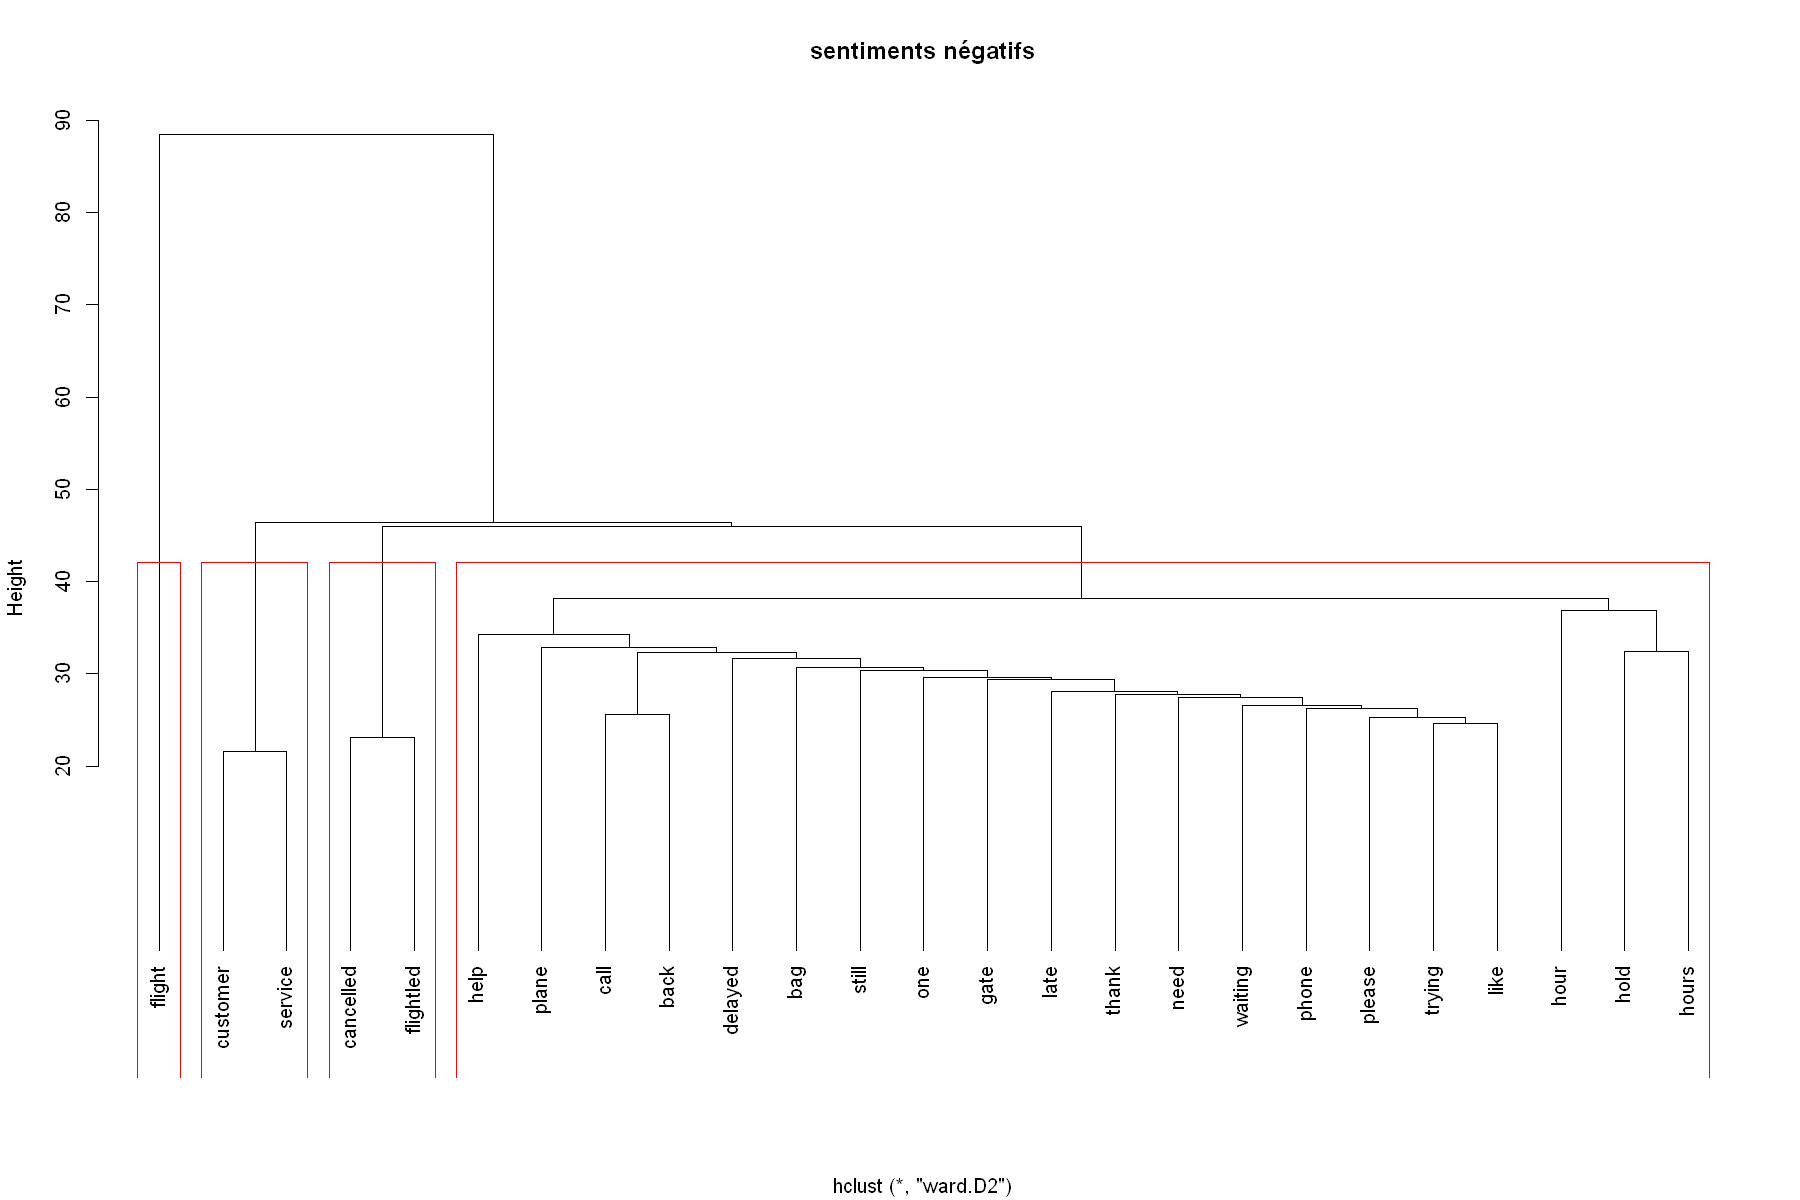

In [128]:
d <- dist(t(as.matrix(negativeWords)))
fit <- hclust(d = d, method = 'ward.D2')


plot.new()
plot(fit, hang=-1, main = 'sentiments négatifs', xlab = '')
rect.hclust(fit, k=4, border="red")

    L'arbre de classification pour les sentiments négatifs montre:
    
    - La deuxième classe regroupe les mots " customer" et "service" et la troisième classe regroupe les mots "cancelled" et 
      "flightled", ce qui est évident car les clients utilisent ces mots pour crtiquer le mauvais service client( customer 
       service) et l'annulation des vols (cancelled flight)
    
    - La plupart des mots dans le quatrième groupe (delayed, still, late, waiting, hour) sont utilisés pour donner un
    sentiment négatif par rapport au retard des vols.

## 4 - Conclusion

    - En terme de conclusion, nous pouvons affirmer l'hypothèse que la majorité des tweets présentent un sentiment      
    négatif,surtout sur les compagnies aériennes United, US Airways et American.
    
    - Pour les problèmes les plus courants en cas d'un mauvais vol on trouve l'annulation des vols, le retard et le mauvais 
    service client.
    
    - L'analyse de ce projet nous a permis de découvrire que les mots les plus utilisées pour exprimer un sentiment négatif 
    sont :"Hour", "Cancelled", "flight", "Service", "waiting" ... et pour les commentaires positifs on trouve : "thanks", 
    "Great", "love", "amazing", ...

***
## Références
***
- Jeu de données: https://www.kaggle.com/welkin10/airline-sentiment-analysis/data

- Text mining avec R : http://www.sthda.com/french/wiki/text-mining-et-nuage-de-mots-avec-le-logiciel-r-5-etapes-simples-a-savoir

- Cours analyse des données: Analyse Factorielle des correspondances et classification.